<a href="https://colab.research.google.com/github/yaramahmoudd11/digit-recognition-cnn/blob/main/digit_recognition_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Reshape for CNN input
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])


In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train_cat, epochs=5, validation_data=(X_test, y_test_cat))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 28ms/step - accuracy: 0.8856 - loss: 0.3553 - val_accuracy: 0.9835 - val_loss: 0.0511
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 27ms/step - accuracy: 0.9822 - loss: 0.0601 - val_accuracy: 0.9899 - val_loss: 0.0296
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.9881 - loss: 0.0396 - val_accuracy: 0.9917 - val_loss: 0.0274
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 26ms/step - accuracy: 0.9900 - loss: 0.0322 - val_accuracy: 0.9916 - val_loss: 0.0252
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 26ms/step - accuracy: 0.9922 - loss: 0.0254 - val_accuracy: 0.9905 - val_loss: 0.0266


In [6]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {test_acc:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9886 - loss: 0.0317
Test Accuracy: 0.99


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


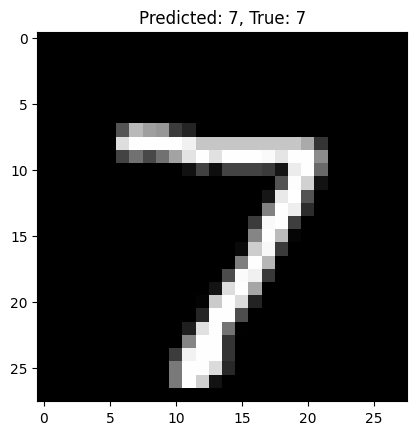

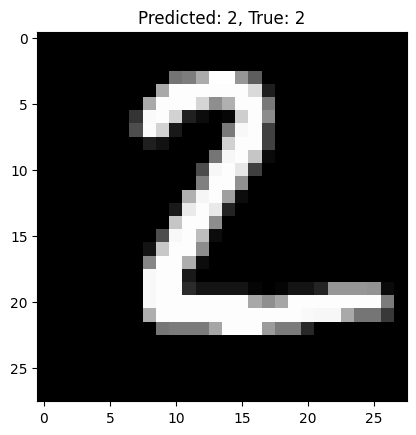

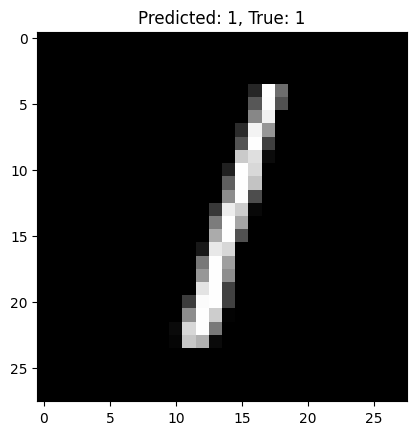

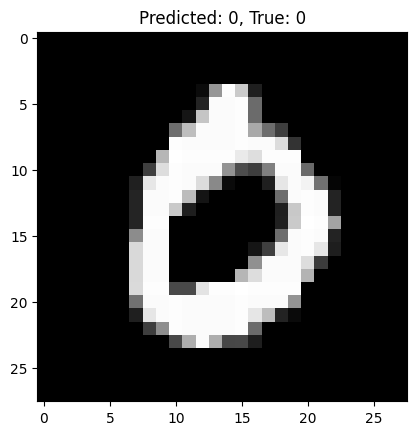

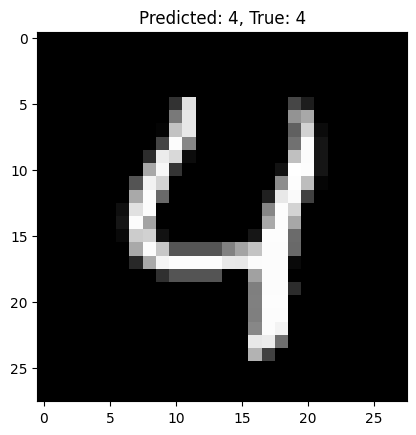

In [7]:
import matplotlib.pyplot as plt
import numpy as np

predictions = model.predict(X_test)

for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}, True: {y_test[i]}")
    plt.show()
